
@author: Octavio Gutiérrez de Código Máquina 

URL del canal: https://www.youtube.com/CodigoMaquina 

URL del video: https://youtu.be/jo3XizfYjek

<!--
<h1 style="color:darkblue;"> Datos categóricos ordinales: <span style="color:purple;">Contexto</span></h1>

<h3 style="color:blue;"> ¿Qué tan satisfecho está con el servicio? </h3>
<ul>
    <li>Muy insatisfecho</li>
    <li>Insatisfecho</li>
    <li>Neutral</li>
    <li>Satisfecho</li>
    <li>Muy satisfecho</li>
</ul>

<h3 style="color:blue;"> ¿Cómo calificaría la calidad de los alimentos? </h3>
<ul>
    <li>Mala</li>
    <li>Buena</li>
    <li>Muy buena</li>
    <li>Excelente</li>
</ul>
-->

<img src="imagenes/intro_varianza.png" width="980" align="left">
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<img src="imagenes/intro_varianza2.png" width="980" align="left">
<BR>
<BR>
<BR>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>

    

# Varianza y Desviación Estándar con Pandas 

In [1]:
import pandas as pd

# quitar notación científica
pd.options.display.float_format = '{:.2f}'.format

# Contexto:
#   (0) Edad,  
#   (1) Gastos mensuales en Medicina, 
#   (2) Gastos mensuales en Educación, y
#   (3) Gastos mensuales en Cacahuates

datos = {"edad" : [35, 50, 22, 45, 18, 75, 55, 20, 23, 49],
         "medicina" : [200, 1500, 150, 250, 0, 2500, 1400, 50, 0, 600],
         "educacion" : [1200, 0, 7500, 2200, 8300, 0, 0, 4900, 5100, 800],
         "cacahuates" : [10, 15, 0, 10, 20, 10, 20, 10, 15, 0]}
         
datos = pd.DataFrame(datos)
datos
datos.aggregate(["std", "var"])

,edad,medicina,educacion,cacahuates
std,18.77,851.49,3198.61,6.99
var,352.40,725027.78,10231111.11,48.89



<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 

# Graficando Desviación Estándar

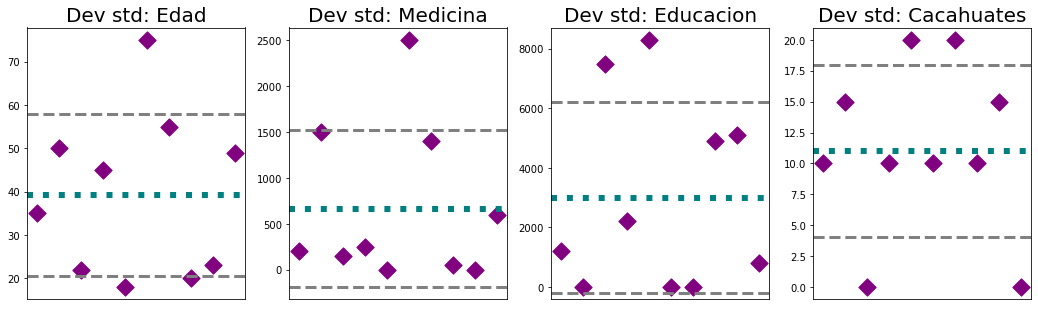

In [2]:
import matplotlib.pyplot as plt

def subgrafica_std(datos, columna, fig, posicion): 
    ax = fig.add_subplot(1, 4, posicion)    
    
    # calculando media y desviación estándar
    media = datos[columna].mean() 
    std = datos[columna].std()
   
    # graficando datos
    ax.scatter(range(len(datos[columna])), datos[columna],
               marker="D", s=150, color="purple")
    
    # graficando media y desviación estándar 
    ax.axhline(y=media+std, color="gray", linestyle="--", linewidth=3)
    ax.axhline(y=media, color="teal", linestyle=":",  linewidth=6)
    ax.axhline(y=media-std, color="gray", linestyle="--", linewidth=3)

    # presentación de gráfica
    ax.set_title("Dev std: " + columna.capitalize(), fontsize=20)
    ax.set_xticks(range(len(datos[columna])))
    ax.get_xaxis().set_visible(False)


# Desviaciones estándar para todas las columnas    
fig = plt.figure(figsize=(18, 5))     

subgrafica_std(datos, "edad", fig, 1)
subgrafica_std(datos, "medicina", fig, 2)
subgrafica_std(datos, "educacion", fig, 3)
subgrafica_std(datos, "cacahuates", fig, 4)

plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<img src="imagenes/intro_varianza3.png" width="980" align="left">
<BR>
<BR>
<BR>
<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

<img src="imagenes/intro_varianza4.png" width="980" align="left">
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR><BR>


# Matriz de Covarianza con Pandas

In [3]:
print(datos.var())
datos.cov()

edad              352.40
medicina       725027.78
educacion    10231111.11
cacahuates         48.89
dtype: float64


,edad,medicina,educacion,cacahuates
edad,352.40,14530.00,-51788.89,-0.78
medicina,14530.00,725027.78,-1923333.33,816.67
educacion,-51788.89,-1923333.33,10231111.11,-500.00
cacahuates,-0.78,816.67,-500.00,48.89


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Graficando Covarianzas

             edad  medicina
edad       352.40  14530.00
medicina 14530.00 725027.78 

               edad   educacion
edad         352.40   -51788.89
educacion -51788.89 10231111.11 

             edad  cacahuates
edad       352.40       -0.78
cacahuates  -0.78       48.89 



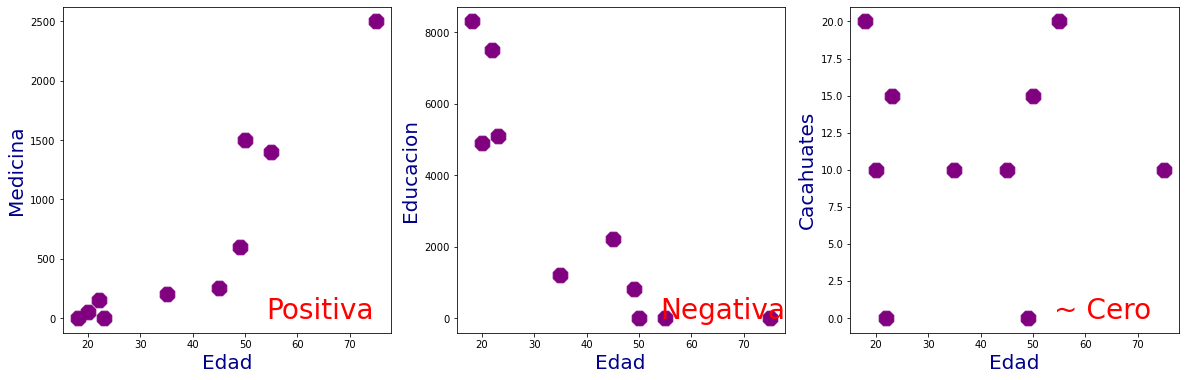





             medicina   educacion
medicina    725027.78 -1923333.33
educacion -1923333.33 10231111.11 

            medicina  cacahuates
medicina   725027.78      816.67
cacahuates    816.67       48.89 

             educacion  cacahuates
educacion  10231111.11     -500.00
cacahuates     -500.00       48.89 



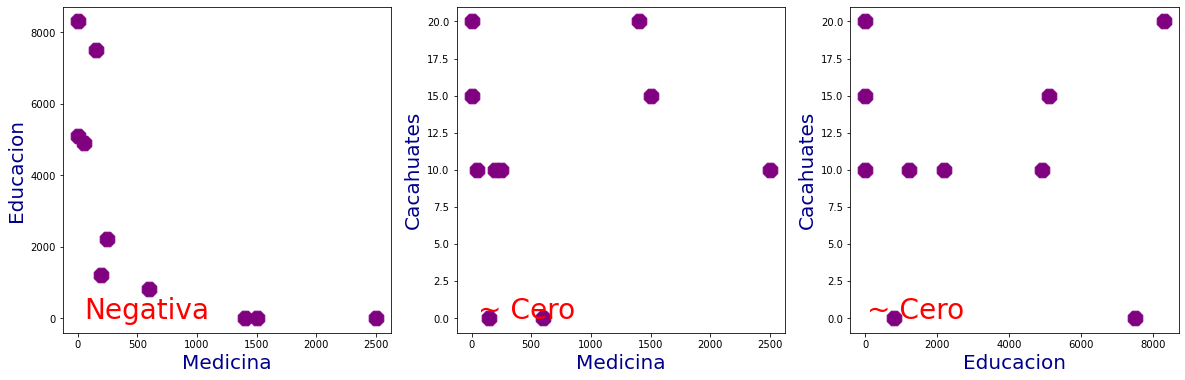

In [4]:
def subgrafica_dispersion(datos, col_a, col_b, fig, posicion, texto): 
    ax = fig.add_subplot(1, 3, posicion)    
    ax.scatter(datos[col_a], datos[col_b], marker="8", s=250, color="purple")
    ax.set_xlabel(col_a.capitalize(), fontsize=20, color="darkblue")
    ax.set_ylabel(col_b.capitalize(), fontsize=20, color="darkblue")
    ax.text(54, 0, texto, fontsize=28, color="red")
    

# Impresión de matrices de covarianza

print(datos[["edad", "medicina"]].cov(), "\n")
print(datos[["edad", "educacion"]].cov(), "\n")
print(datos[["edad", "cacahuates"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))
subgrafica_dispersion(datos, "edad", "medicina", fig, 1, "Positiva")     
subgrafica_dispersion(datos, "edad", "educacion", fig, 2, "Negativa")     
subgrafica_dispersion(datos, "edad", "cacahuates", fig, 3, "~ Cero")     
plt.show()


# Impresión de matrices de covarianza

print("\n"*3)
print(datos[["medicina", "educacion"]].cov(), "\n")
print(datos[["medicina", "cacahuates"]].cov(), "\n")
print(datos[["educacion", "cacahuates"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))
subgrafica_dispersion(datos, "medicina", "educacion", fig, 1, "Negativa")     
subgrafica_dispersion(datos, "medicina", "cacahuates", fig, 2, "~ Cero")     
subgrafica_dispersion(datos, "educacion", "cacahuates", fig, 3, "~ Cero") 
plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>